In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('/content/dados_bcb.csv', sep=';', encoding='cp1252')
df.head()

,Data,433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal,4380 - PIB mensal - Valores correntes (R$ milhões) - R$ (milhões),4390 - Taxa de juros - Selic acumulada no mês - % a.m.,7836 - Saldo mensal de depósitos de poupança - SBPE e rural - u.m.c. (milhões),24369 - Taxa de desocupação - PNADC - %,27790 - Meios de pagamento - Depósitos à vista (saldo em final de período) - Novo - u.m.c. (mil),27805 - Meios de pagamento amplos - Depósitos a prazo (saldo em final de período) - Novo - u.m.c. (mil)
0,jan/22,"0,54","723.753,60","0,73",1.016.336,"11,2",327.800.630,1.847.728.489
1,fev/22,"1,01","753.468,20","0,76",1.016.206,"11,2",333.167.467,1.876.970.776
2,mar/22,"1,62","842.306,40","0,93",1.006.168,"11,1",335.803.641,1.934.157.259
3,abr/22,"1,06","832.164,10","0,83",1.002.013,"10,5",342.279.371,1.959.695.473
4,mai/22,"0,47","841.829,70","1,03",1.011.083,"9,8",331.986.501,2.014.370.891


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 8 columns):
 #   Column                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                   --------------  ----- 
 0   Data                                                                                                     37 non-null     object
 1   433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal                               37 non-null     object
 2   4380 - PIB mensal - Valores correntes (R$ milhões) - R$ (milhões)                                        37 non-null     object
 3   4390 - Taxa de juros - Selic acumulada no mês - % a.m.                                                   37 non-null     object
 4   7836 - Saldo mensal de depósitos de poupança - SBPE e rural - u.m.c. (milhões)                 

In [ ]:
df.columns = [
    'Data', 'IPCA', 'PIB', 'Selic',
    'Poupanca', 'Desemprego', 'Depositos_Vista', 'Depositos_Prazo'
]

df = df[df['Data'].astype(str).str.contains('/')].copy()

cols_numericas = ['IPCA', 'PIB', 'Selic', 'Poupanca', 'Desemprego', 'Depositos_Vista', 'Depositos_Prazo']

for col in cols_numericas:
    df[col] = df[col].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col])

In [ ]:
meses = {
    'jan': '01', 'fev': '02', 'mar': '03', 'abr': '04', 'mai': '05', 'jun': '06',
    'jul': '07', 'ago': '08', 'set': '09', 'out': '10', 'nov': '11', 'dez': '12'
}

def tratar_data(x):
    mes_str, ano_str = x.split('/')
    mes_num = meses[mes_str.lower()]
    return pd.to_datetime(f"20{ano_str}-{mes_num}-01")

df['Data_dt'] = df['Data'].apply(tratar_data)
df = df.sort_values('Data_dt')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Data             36 non-null     object        
 1   IPCA             36 non-null     int64         
 2   PIB              36 non-null     float64       
 3   Selic            36 non-null     float64       
 4   Poupanca         36 non-null     int64         
 5   Desemprego       36 non-null     float64       
 6   Depositos_Vista  36 non-null     int64         
 7   Depositos_Prazo  36 non-null     int64         
 8   Data_dt          36 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 2.8+ KB


In [ ]:
df['Depositos_Totais'] = df['Poupanca'] + (df['Depositos_Vista'] / 1000) + (df['Depositos_Prazo'] / 1000)

In [ ]:
correlacao = df[['Depositos_Totais', 'PIB', 'Selic', 'IPCA', 'Desemprego']].corr()
print("=== MATRIZ DE CORRELAÇÃO ===")
print(correlacao)
print("\n" + "="*50 + "\n")

In [ ]:
X = df[['PIB', 'Selic', 'IPCA', 'Desemprego']]
y = df['Depositos_Totais']

X = sm.add_constant(X)

modelo = sm.OLS(y, X).fit()

print("=== RESULTADO DA REGRESSÃO (OLS) ===")
print(modelo.summary())

=== RESULTADO DA REGRESSÃO (OLS) ===
                            OLS Regression Results                            
Dep. Variable:       Depositos_Totais   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     181.4
Date:                Sat, 22 Nov 2025   Prob (F-statistic):           4.96e-21
Time:                        18:51:58   Log-Likelihood:                -460.05
No. Observations:                  36   AIC:                             930.1
Df Residuals:                      31   BIC:                             938.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.3

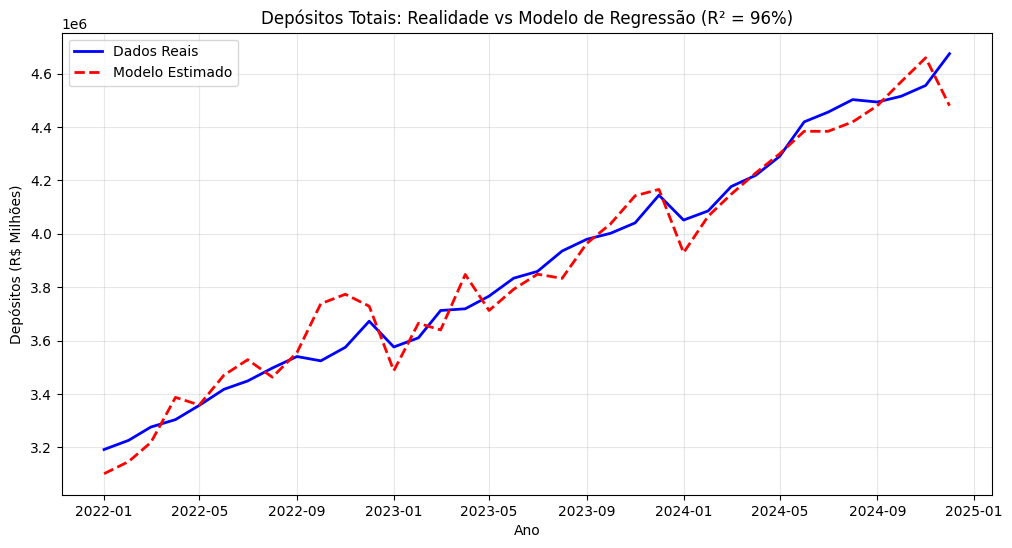

In [ ]:
df['Depositos_Estimados'] = modelo.predict(X)

plt.figure(figsize=(12, 6))

plt.plot(df['Data_dt'], df['Depositos_Totais'], label='Dados Reais', color='blue', linewidth=2)
plt.plot(df['Data_dt'], df['Depositos_Estimados'], label='Modelo Estimado', color='red', linestyle='--', linewidth=2)

plt.title('Depósitos Totais: Realidade vs Modelo de Regressão (R² = 96%)')
plt.ylabel('Depósitos (R$ Milhões)')
plt.xlabel('Ano')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()